In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import plotly.express as px
import plotly.express as px
from plotly.offline import iplot
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
from scipy.stats import norm

In [11]:
import easygui

In [2]:
df = pd.read_csv('/Users/giridharana.r/Desktop/S Assignments/DATA 270 - GWAR/Datasets/data 2.csv')

In [4]:

df1 = pd.read_excel('/Users/giridharana.r/Downloads/Taiwan_modified (1).xlsx')

In [5]:
df.head()

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0          1                                           0.370594          
1          1                                           0.464291          
2          1                                           0.426071          
3          1                                           0.399844          
4          1                                           0.465022          

    ROA(A) before interest and % after tax  \
0                                 0.424389   
1                                 0.538214   
2                                 0.499019   
3                                 0.451265   
4                                 0.538432   

    ROA(B) before interest and depreciation after tax  \
0                                           0.405750    
1                                           0.516730    
2                                           0.472295    
3                                           0.457733    
4                                           0.522298    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                 0.601457                      0.601457   
1                 0.610235                      0.610235   
2                 0.601450                      0.601364   
3                 0.583541                      0.583541   
4                 0.598783                      0.598783   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0                0.998969                    0.796887   
1                0.998946                    0.797380   
2                0.998857                    0.796403   
3                0.998700                    0.796967   
4                0.998973                    0.797366   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                      0.808809                                      0.302646   
1                      0.809301                                      0.303556   
2                      0.808388                                      0.302035   
3                      0.808966                                      0.303350   
4                      0.809304                                      0.303475   

    Continuous interest rate (after tax)   Operating Expense Rate  \
0                               0.780985             1.256969e-04   
1                               0.781506             2.897851e-04   
2                               0.780284             2.361297e-04   
3                               0.781241             1.078888e-04   
4                               0.781550             7.890000e+09   

    Research and development expense rate   Cash flow rate  \
0                                     0.0         0.458143   
1                                     0.0         0.461867   
2                              25500000.0         0.458521   
3                                     0.0         0.465705   
4                                     0.0         0.462746   

    Interest-bearing debt interest rate   Tax rate (A)  \
0                              0.000725            0.0   
1                              0.000647            0.0   
2                              0.000790            0.0   
3                              0.000449            0.0   
4                              0.000686            0.0   

    Net Value Per Share (B)   Net Value Per Share (A)  \
0                  0.147950                  0.147950   
1                  0.182251                  0.182251   
2                  0.177911                  0.177911   
3                  0.154187                  0.154187   
4                  0.167502                  0.167502   

    Net Value Per Share (C)   Persistent EPS in the Last Four Seasons  \
0                  0.147950                                  0.169141   
1                  0.182251                                  0.208944   
2                  0.193713                     

In [6]:
df.shape

(6819, 96)

#### Missing values

In [5]:
df.isnull().sum()

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
 Realized Sales Gross Margin                                0
 Operating Profit Rate                                      0
 Pre-tax net Interest Rate                                  0
 After-tax net Interest Rate                                0
 Non-industry income and expenditure/revenue                0
 Continuous interest rate (after tax)                       0
 Operating Expense Rate                                     0
 Research and development expense rate                      0
 Cash flow rate                                             0
 Interest-bearing debt interest rate                        0
 Tax rate (A)                                               0
 Net Val

In [6]:
df.isnull().sum() * 100 / len(df) 

Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
NumExpr defaulting to 8 threads.


Bankrupt?                                                   0.0
 ROA(C) before interest and depreciation before interest    0.0
 ROA(A) before interest and % after tax                     0.0
 ROA(B) before interest and depreciation after tax          0.0
 Operating Gross Margin                                     0.0
 Realized Sales Gross Margin                                0.0
 Operating Profit Rate                                      0.0
 Pre-tax net Interest Rate                                  0.0
 After-tax net Interest Rate                                0.0
 Non-industry income and expenditure/revenue                0.0
 Continuous interest rate (after tax)                       0.0
 Operating Expense Rate                                     0.0
 Research and development expense rate                      0.0
 Cash flow rate                                             0.0
 Interest-bearing debt interest rate                        0.0
 Tax rate (A)                           

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [14]:
df.describe()

Bankrupt?   ROA(C) before interest and depreciation before interest  \
count  6819.000000                                        6819.000000          
mean      0.032263                                           0.505180          
std       0.176710                                           0.060686          
min       0.000000                                           0.000000          
25%       0.000000                                           0.476527          
50%       0.000000                                           0.502706          
75%       0.000000                                           0.535563          
max       1.000000                                           1.000000          

        ROA(A) before interest and % after tax  \
count                              6819.000000   
mean                                  0.558625   
std                                   0.065620   
min                                   0.000000   
25%                                   0.535543   
50%                                   0.559802   
75%                                   0.589157   
max                                   1.000000   

        ROA(B) before interest and depreciation after tax  \
count                                        6819.000000    
mean                                            0.553589    
std                                             0.061595    
min                                             0.000000    
25%                                             0.527277    
50%                                             0.552278    
75%                                             0.584105    
max                                             1.000000    

        Operating Gross Margin   Realized Sales Gross Margin  \
count              6819.000000                   6819.000000   
mean                  0.607948                      0.607929   
std                   0.016934                      0.016916   
min                   0.000000                      0.000000   
25%                   0.600445                      0.600434   
50%                   0.605997                      0.605976   
75%                   0.613914                      0.613842   
max                   1.000000                      1.000000   

        Operating Profit Rate   Pre-tax net Interest Rate  \
count             6819.000000                 6819.000000   
mean                 0.998755                    0.797190   
std                  0.013010                    0.012869   
min                  0.000000                    0.000000   
25%                  0.998969                    0.797386   
50%                  0.999022                    0.797464   
75%                  0.999095                    0.797579   
max                  1.000000                    1.000000   

        After-tax net Interest Rate  \
count                   6819.000000   
mean                       0.809084   
std                        0.013601   
min                        0.000000   
25%                        0.809312   
50%                        0.809375   
75%                        0.809469   
max                        1.000000   

        Non-industry income and expenditure/revenue  \
count                                   6819.000000   
mean                                       0.303623   
std                                        0.011163   
min                                        0.000000   
25%                                        0.303466   
50%                                        0.303525   
75%                                        0.303585   
max                                        1.000000   

        Continuous interest rate (after tax)   Operating Expense Rate  \
count                            6819.000000             6.819000e+03   
mean                                0.781381             1.995347e+09   
std                                 0.012679             3.237684e+09   
min                 

### Duplicate rows

In [15]:
df.duplicated().sum()

0

### Checking the target variable

In [7]:
y = df['Bankrupt?'].value_counts()

In [8]:
y

0    6599
1     220
Name: Bankrupt?, dtype: int64

In [9]:
y = df['Bankrupt?'].value_counts()
print("The number of non bankrupt companies is:", y[0])
print("The number of bankrupt companies is:", y[1])

The number of non bankrupt companies is: 6599
The number of bankrupt companies is: 220


In [10]:
px.histogram(df,x='Bankrupt?',color='Bankrupt?',title="Target Feature Distribution",width=500,height=500)

In [21]:
print("The number of companies which are not bankrupt is",(y[0]))
y1 = (y[0]/y.sum())*100
print("The number of companies which are not bankrupt is",round(y1,2),"%")

The number of companies which are not bankrupt is 6599
The number of companies which are not bankrupt is 96.77 %


In [23]:
print("The number of companies which are bankrupt is",(y[1]))
y2 = (y[1]/y.sum())*100
print("The number of companies which are bankrupt is",round(y2,2),"%")

The number of companies which are bankrupt is 220
The number of companies which are bankrupt is 3.23 %


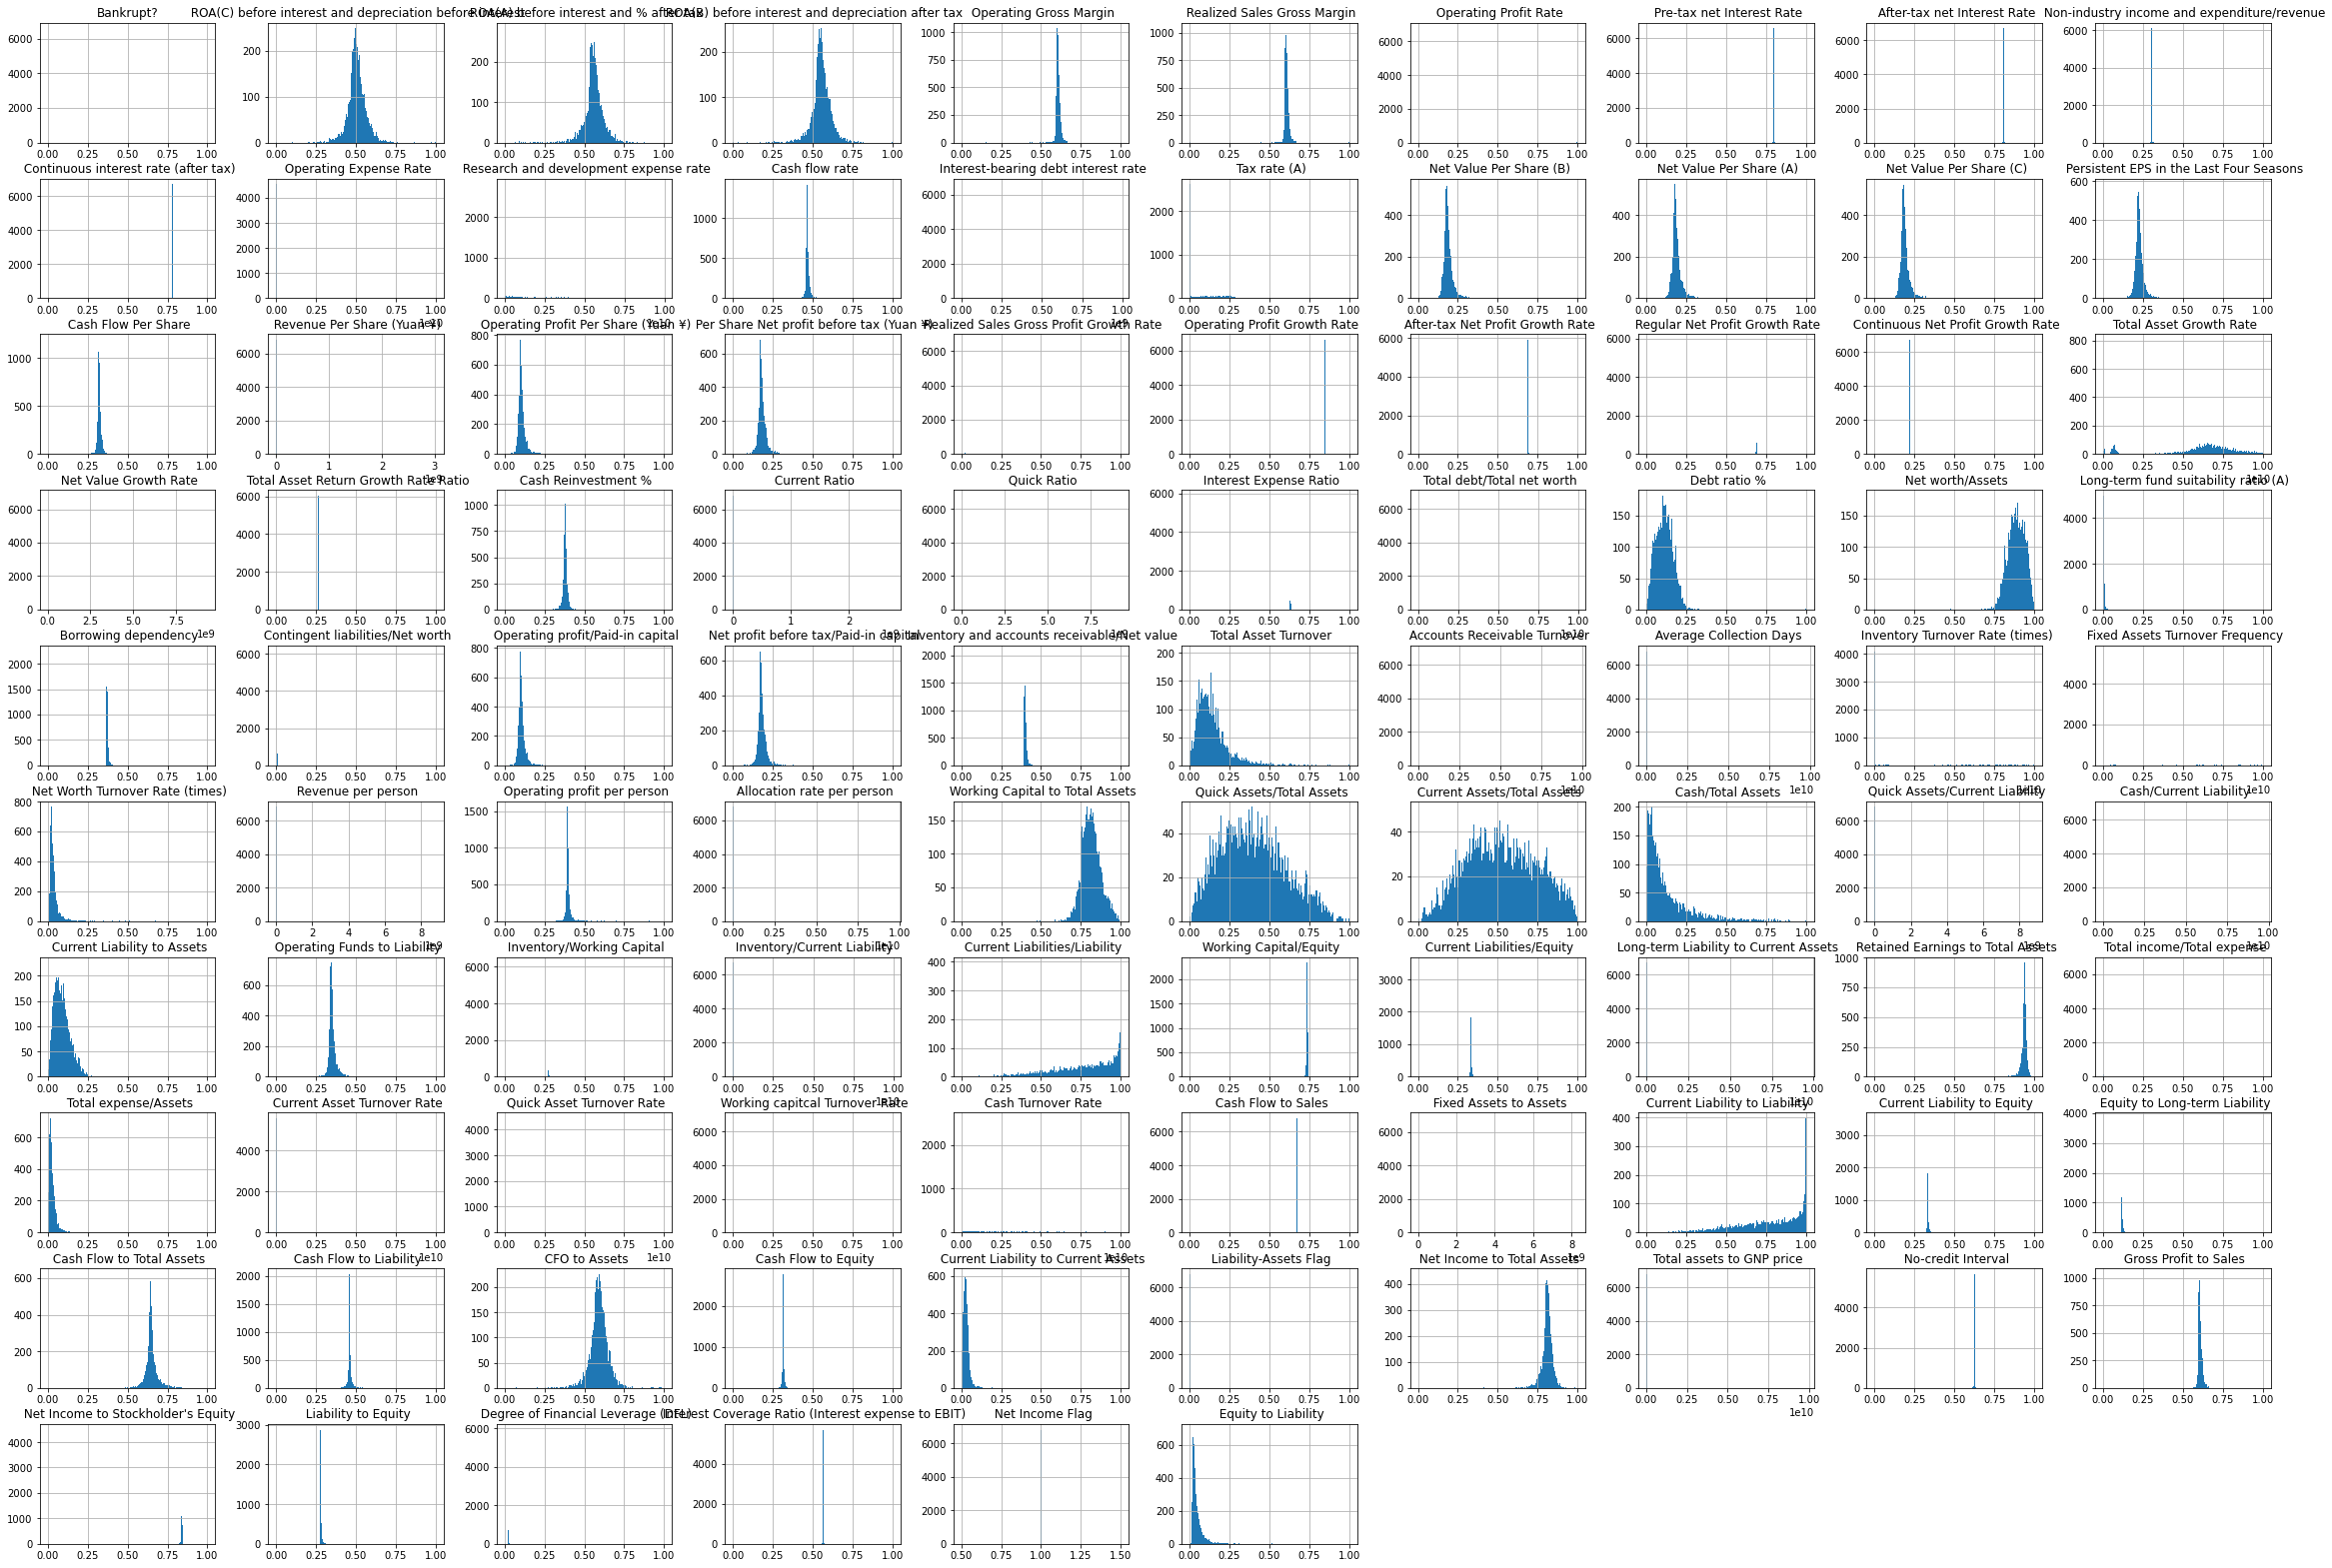

In [25]:
df.hist(figsize = (40,28), bins = 300)
plt.show()

In [27]:
px.histogram(df,x=' ROA(C) before interest and depreciation before interest',title="ROA(C) before interest and depreciation before interest",width=500,height=500)

In [29]:
px.histogram(df,x=" ROA(A) before interest and % after tax",title=" ROA(A) before interest and % after tax",width=500,height=500)

In [33]:
px.histogram(df,x=" Quick Assets/Total Assets",title=" Quick Assets/Total Assets",width=500,height=500)

In [36]:
px.histogram(df,x=" Current Liabilities/Liability",title="Current Liabilities/Liability",width=500,height=500)

In [38]:
px.histogram(df,x=" Cash/Total Assets",title="Cash/Total Assets",width=500,height=500)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/opt/anaconda3/lib/python3.8/site-pac

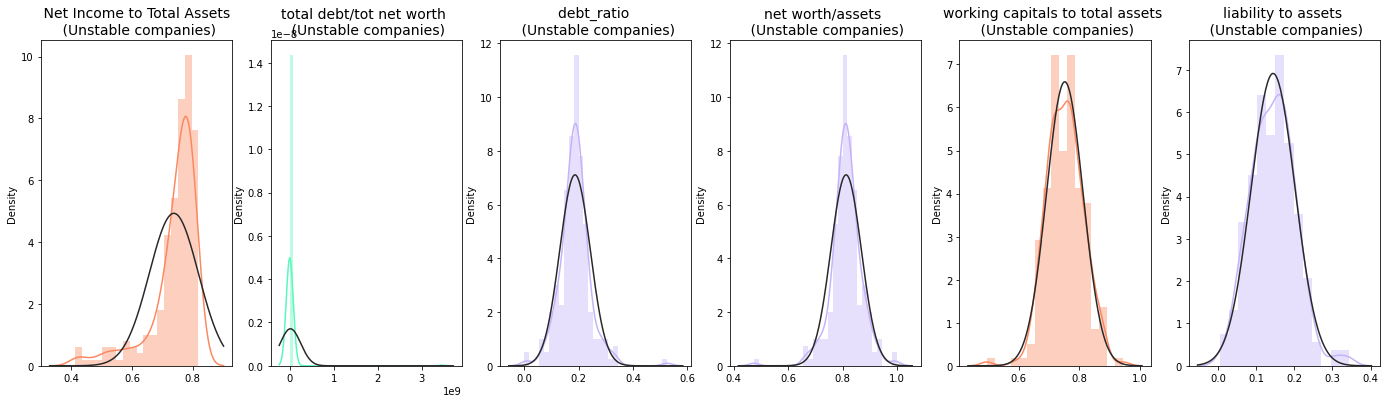

In [22]:
f, (ax1, ax2, ax3, ax4,ax5,ax6) = plt.subplots(1,6, figsize=(24, 6))

cash_flow_rate = df[' Net Income to Total Assets'].loc[df['Bankrupt?'] == 1].values
sns.distplot(cash_flow_rate,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title(' Net Income to Total Assets \n (Unstable companies)', fontsize=14)

tot_debt_net = df[' Total debt/Total net worth'].loc[df['Bankrupt?'] == 1].values
sns.distplot(tot_debt_net ,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('total debt/tot net worth \n (Unstable companies)', fontsize=14)


debt_ratio = df[' Debt ratio %'].loc[df['Bankrupt?'] == 1].values
sns.distplot(debt_ratio,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('debt_ratio \n (Unstable companies)', fontsize=14)

net_worth_assets = df[' Net worth/Assets'].loc[df['Bankrupt?'] == 1].values
sns.distplot(net_worth_assets,ax=ax4, fit=norm, color='#C5B3F9')
ax4.set_title('net worth/assets \n (Unstable companies)', fontsize=14)

working_cap = df[' Working Capital to Total Assets'].loc[df['Bankrupt?'] == 1].values
sns.distplot(working_cap,ax=ax5, fit=norm, color='#FB8861')
ax5.set_title('working capitals to total assets \n (Unstable companies)', fontsize=14)

asset_liab = df[' Current Liability to Assets'].loc[df['Bankrupt?'] == 1].values
sns.distplot(asset_liab,ax=ax6, fit=norm, color='#C5B3F9')
ax6.set_title('liability to assets \n (Unstable companies)', fontsize=14)

plt.show()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



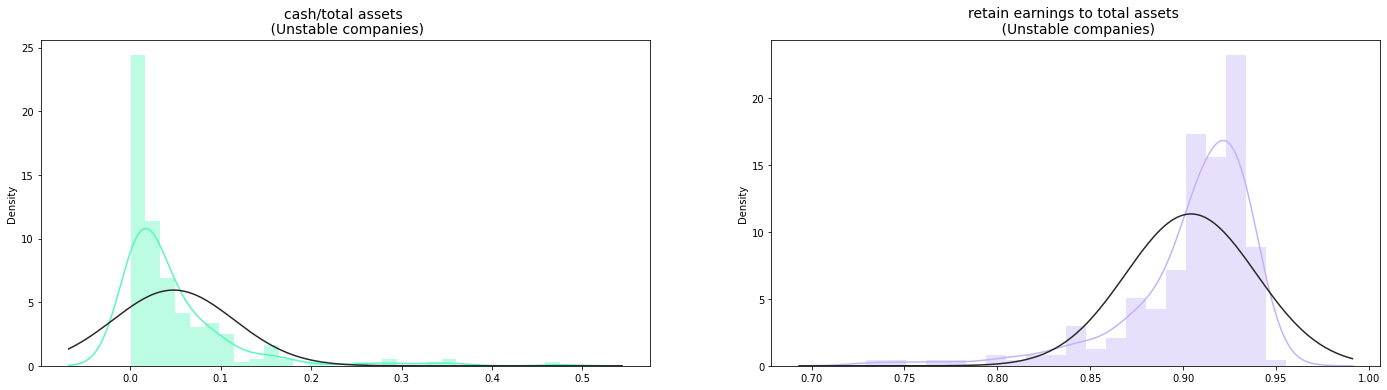

In [24]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(24, 6))
cash_tot_assets = df[' Cash/Total Assets'].loc[df['Bankrupt?'] == 1].values
sns.distplot(cash_tot_assets ,ax=ax1, fit=norm, color='#56F9BB')
ax1.set_title('cash/total assets \n (Unstable companies)', fontsize=14)

operating_funds = df[' Retained Earnings to Total Assets'].loc[df['Bankrupt?'] == 1].values
sns.distplot(operating_funds,ax=ax2, fit=norm, color='#C5B3F9')
ax2.set_title('retain earnings to total assets \n (Unstable companies)', fontsize=14)

plt.show()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='EPS', ylabel='Density'>

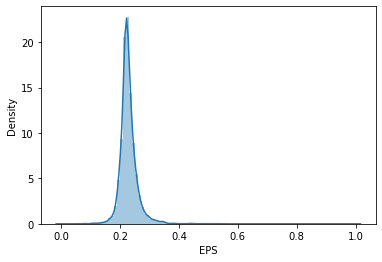

In [81]:
sns.distplot(df1['EPS'],kde=True,bins=100)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Profitability', ylabel='Density'>

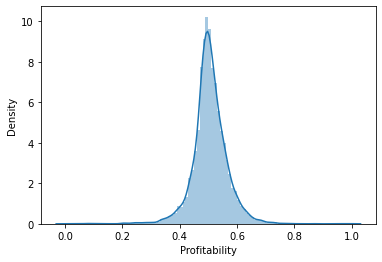

In [82]:
sns.distplot(df1['Profitability'],kde=True,bins=100)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Asset Turnover', ylabel='Density'>

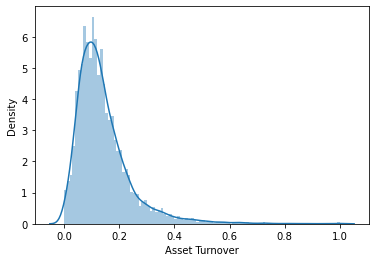

In [84]:
sns.distplot(df1['Asset Turnover'],kde=True,bins=100)

#### Correlation Analysis


#### Correlation Matrix

In [43]:
corr = df.corr()
plt.figure(figsize=(200,100))
sns.heatmap(corr, annot=True,fmt= '.2f', cmap='RdYlGn')

<AxesSubplot:>

In [47]:
corr = df1.corr()

<AxesSubplot:>

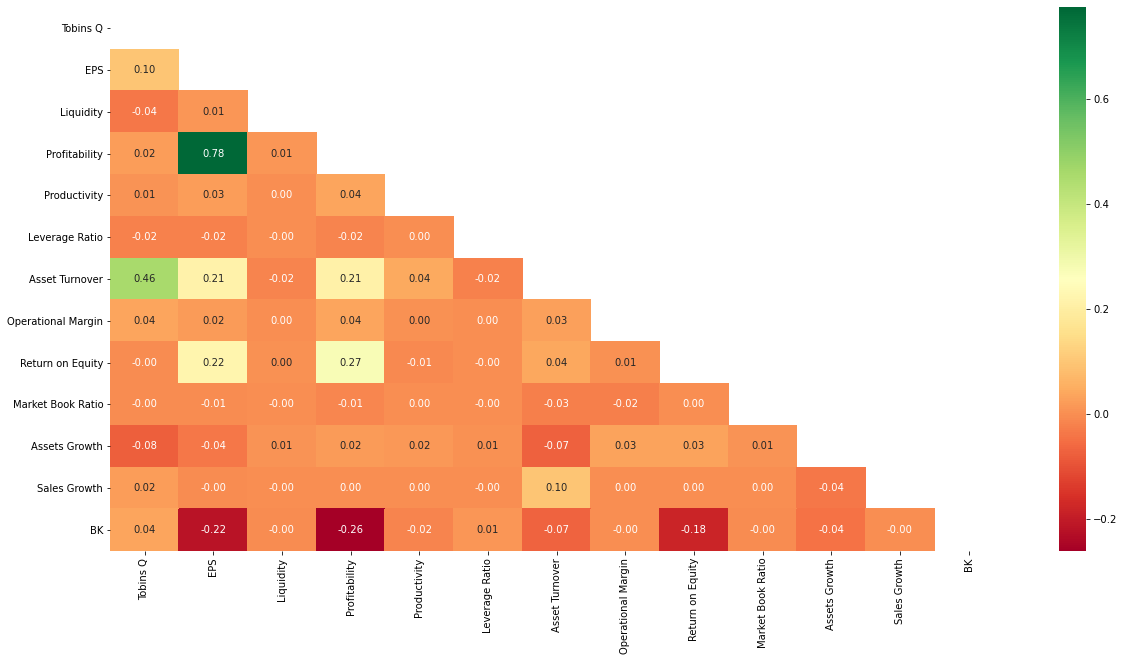

In [48]:
plt.figure(figsize=(20,10))
matrix = np.triu(corr)
sns.heatmap(corr, annot=True,fmt= '.2f', cmap='RdYlGn',mask=matrix)

In [12]:
df1.head()

Tobins Q       EPS  Liquidity  Profitability  Productivity  Leverage Ratio  \
0  0.880352  0.169141   0.002259       0.370594      0.848195        0.026601   
1  0.922287  0.208944   0.006016       0.464291      0.848088        0.264577   
2  1.037018  0.180581   0.011543       0.426071      0.848094        0.026555   
3  0.877219  0.193722   0.004194       0.399844      0.848005        0.026697   
4  0.858332  0.212537   0.006022       0.465022      0.848258        0.024752   

   Asset Turnover  Operational Margin  Return on Equity  Market Book Ratio  \
0        0.086957            0.998969          0.827890           0.112310   
1        0.064468            0.998946          0.839969           0.174045   
2        0.014993            0.998857          0.836774           0.025855   
3        0.089955            0.998700          0.834697           4.451598   
4        0.175412            0.998973          0.839973           2.028921   

   Assets Growth  Sales Growth  BK  
0   4.980000e+09      0.022102   1  
1   6.110000e+09      0.022080   1  
2   7.280000e+09      0.022760   1  
3   4.880000e+09      0.022046   1  
4   5.510000e+09      0.022096   1

In [19]:
df2 = df1[['Tobins Q','EPS','Liquidity','Asset Turnover','Assets Growth']]

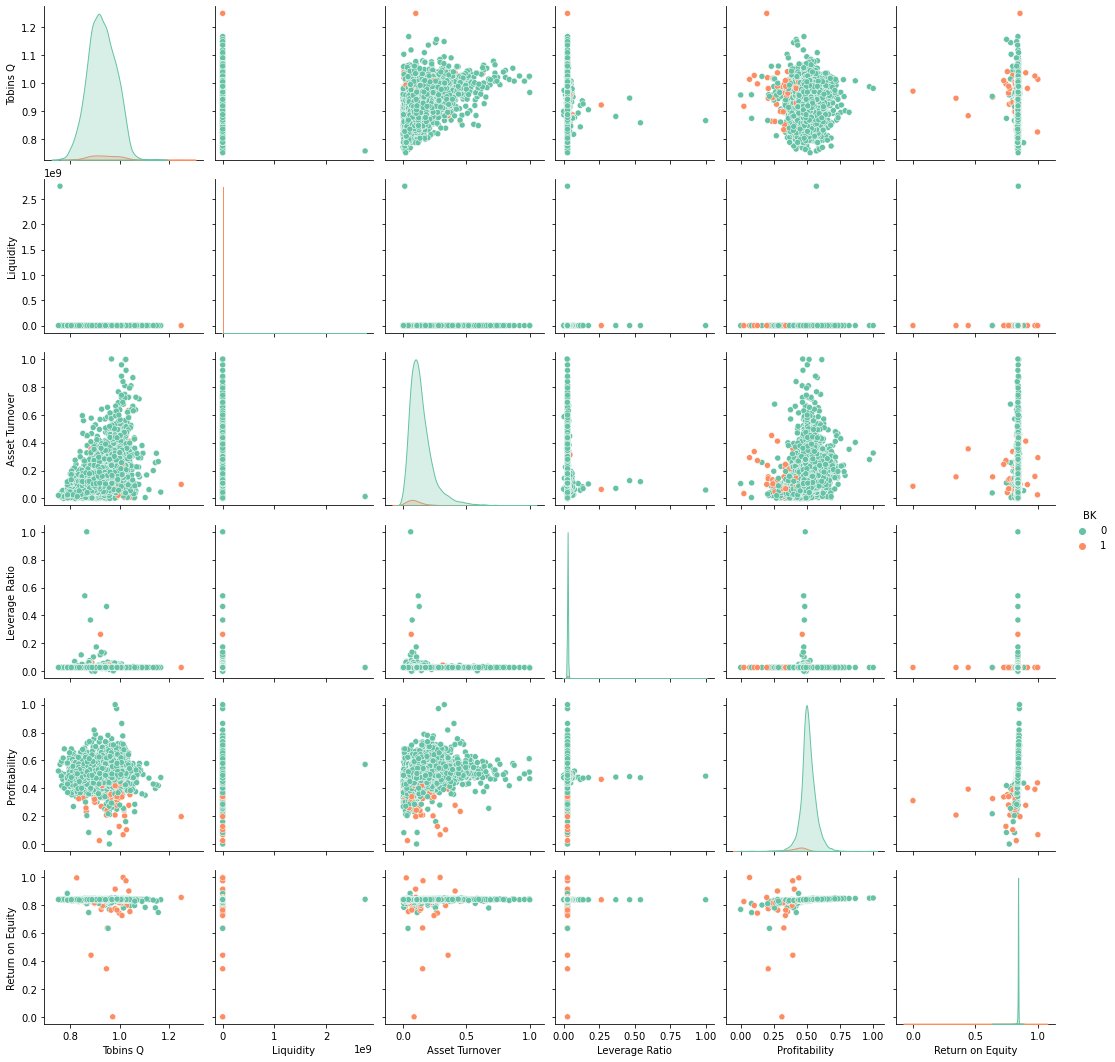

In [24]:
g = sns.pairplot(df1[['Tobins Q','Liquidity','Asset Turnover','Leverage Ratio','Profitability','Return on Equity', 'BK']], hue="BK", palette="Set2", diag_kind="kde", height=2.5)


In [62]:
fig = px.scatter(df1,x="Asset Turnover", y="Profitability",color = 'BK',width=600,height=500, title="Asset Turnover vs Profitability")
fig.show()

In [60]:
fig = px.scatter(df1,x="Assets Growth", y="Profitability",color = 'BK',width=600,height=500, title="Assets Growth vs Profitability")
fig.show()

In [67]:
fig = px.scatter(df1,x="EPS", y="Profitability",color = 'BK',width=600,height=500, title="EPS vs Profitability")
fig.show()

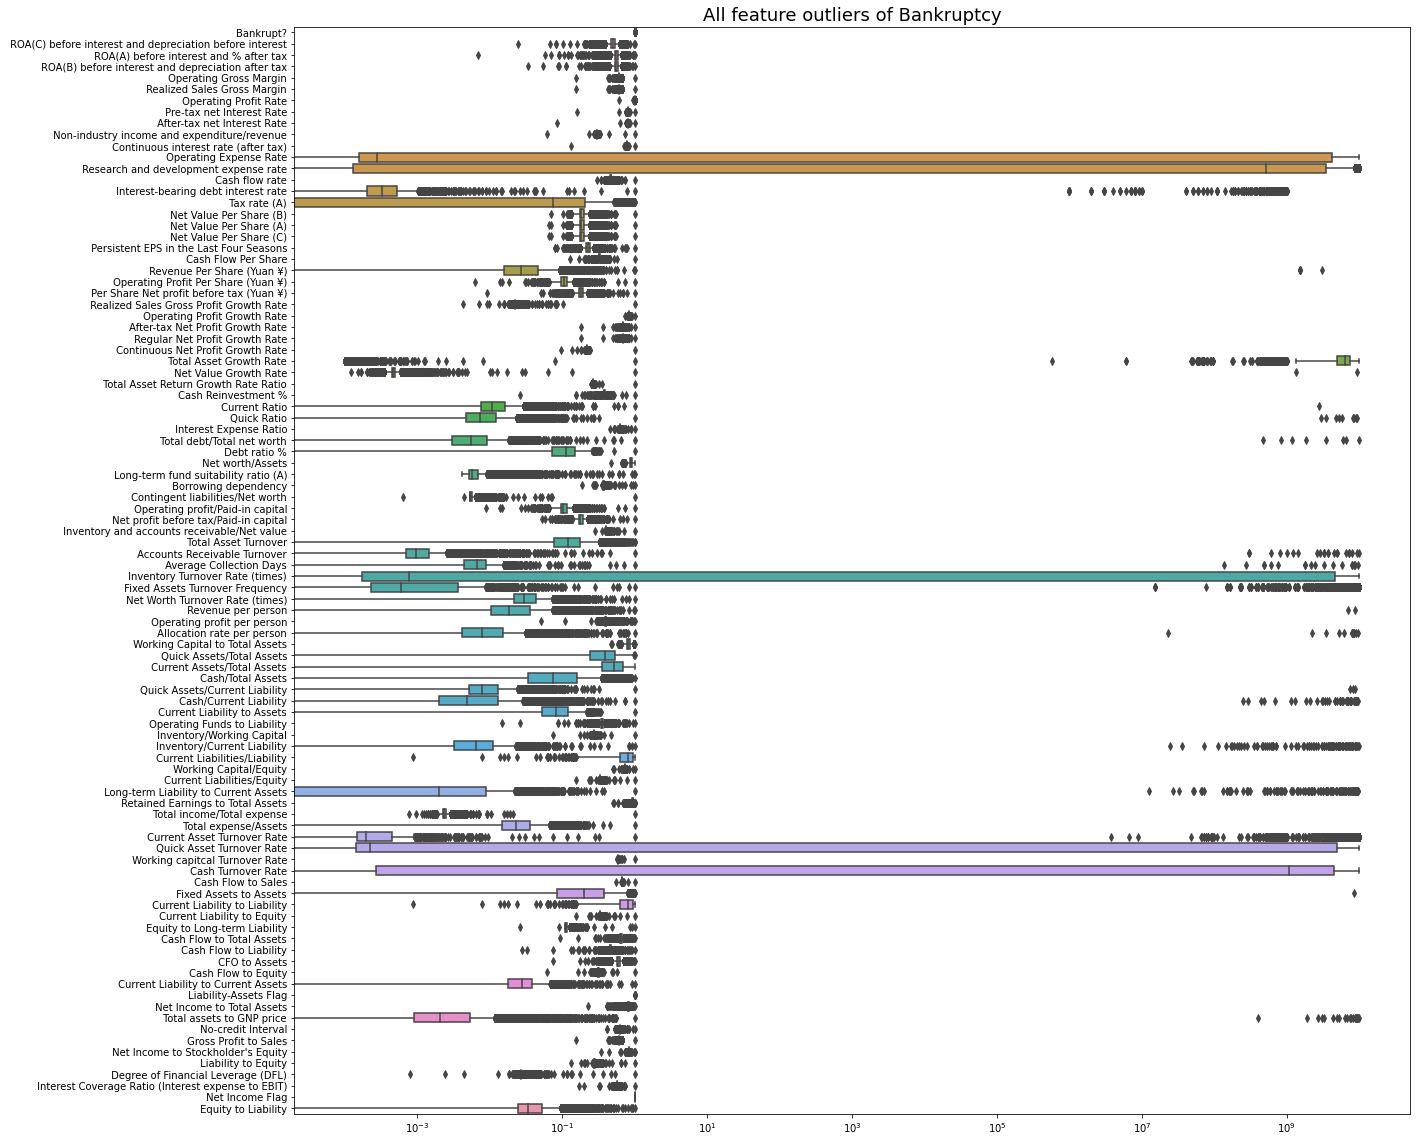

In [7]:
plt.figure(figsize = (20,20))
All_boxplots = sns.boxplot(data = df, orient="h")
All_boxplots.set_title('All feature outliers of Bankruptcy', fontsize = 18)
All_boxplots.set(xscale="log")
plt.show()

Text(0.5, 1.0, 'Bankruptcy vs EPS')

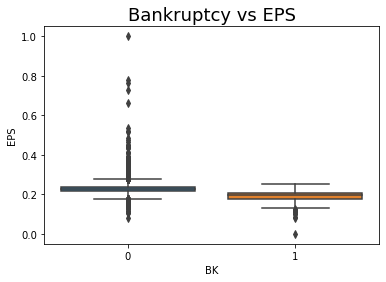

In [70]:
net_come = sns.boxplot(x='BK', y="EPS", data=df1)
net_come.set_title('Bankruptcy vs EPS', fontsize = 18)

Text(0.5, 1.0, 'Bankruptcy vs Liquiidty')

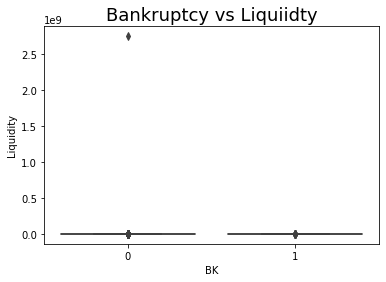

In [71]:
net_come = sns.boxplot(x='BK', y="Liquidity", data=df1)
net_come.set_title('Bankruptcy vs Liquiidty', fontsize = 18)

Text(0.5, 1.0, 'Bankruptcy vs Profitability')

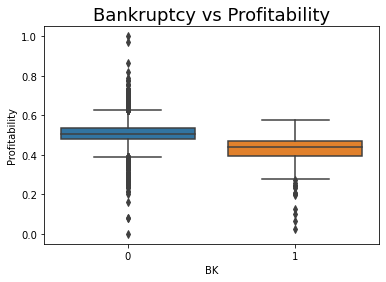

In [72]:
net_come = sns.boxplot(x='BK', y="Profitability", data=df1)
net_come.set_title('Bankruptcy vs Profitability', fontsize = 18)

Text(0.5, 1.0, 'Bankruptcy vs Market Book Ratio')

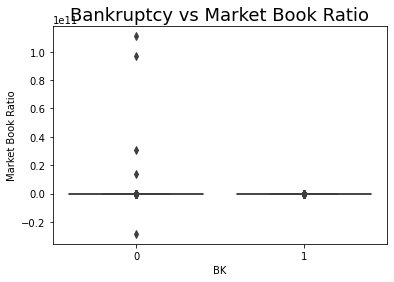

In [73]:
net_come = sns.boxplot(x='BK', y="Market Book Ratio", data=df1)
net_come.set_title('Bankruptcy vs Market Book Ratio', fontsize = 18)

Text(0.5, 1.0, 'Bankruptcy vs Assets Growth')

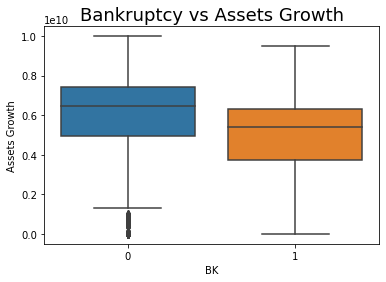

In [74]:
net_come = sns.boxplot(x='BK', y="Assets Growth", data=df1)
net_come.set_title('Bankruptcy vs Assets Growth', fontsize = 18)

#### Handling Taiwan outliers


In [12]:
def outliers(dx,ft):

  for f in ft:  
    Q1 = dx[ft].quantile(0.25)
    Q3 = dx[ft].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    higher = Q3 + 1.5 * IQR
    mean = df[ft].mean()
    dx[ft] = np.where(dx[ft]>higher, mean, 
             np.where(dx[ft]<lower,mean,dx[ft]))

In [13]:
features = []
for i in range(len(df.columns)-1):
  features.append(df.columns[i])

In [14]:
outliers(df,features)

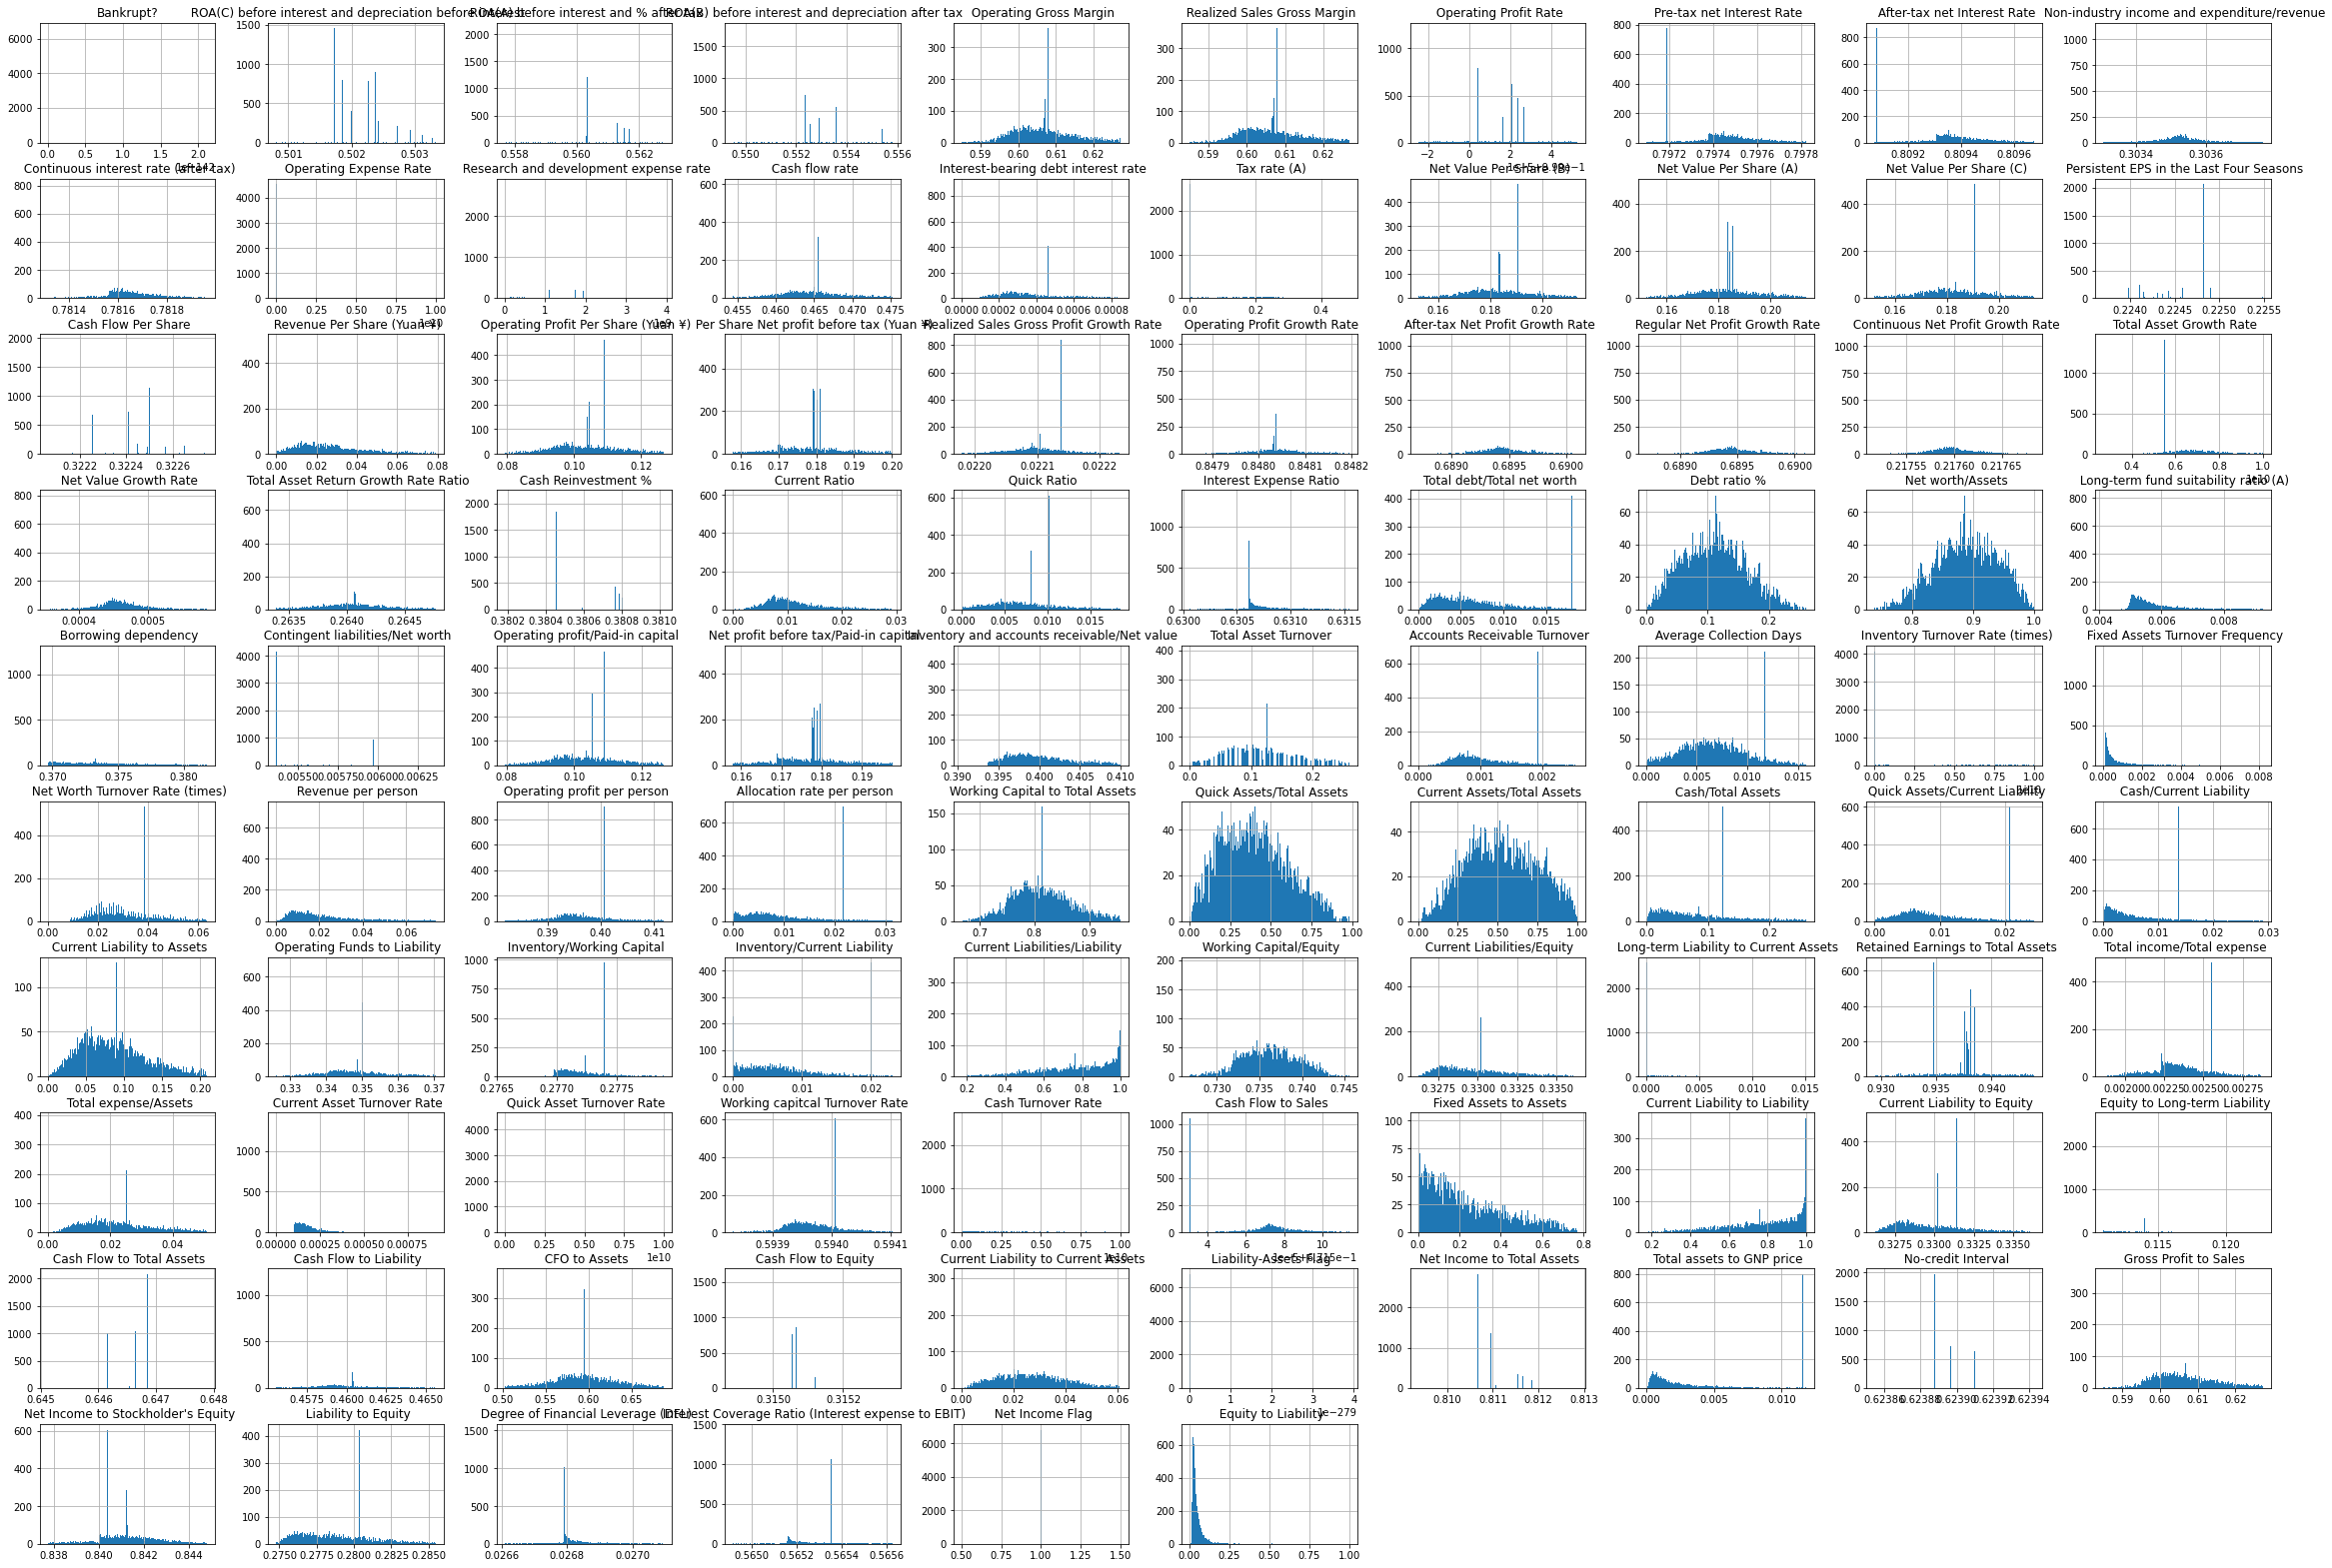

In [16]:
df.hist(figsize = (40,28), bins = 300)
plt.show()